In [1]:
from nets import ConvDecoder, Classifier
from fep import FEP
import torch
import pickle
import random
import matplotlib.pyplot as plt
import numpy as np

In [4]:
with open("/home/simon/catkin_ws/src/turtlebot3_gazebo/scripts/data/shapes_fixed_rgb8_1_10k_norm_np.pkl", 'rb') as f:
    data = pickle.load(f)

pose, img = data

decoder = ConvDecoder()
decoder.load_state_dict(torch.load("/home/simon/catkin_ws/src/turtlebot3_gazebo/scripts/deconv_shapes_fixed_1_200e.pt"))
decoder.eval()

classifier = Classifier()
classifier.load_state_dict(torch.load("/home/simon/catkin_ws/src/turtlebot3_gazebo/scripts/trained_conv_nets/classifier_1_100e.pt"))
classifier.eval()

fep = FEP(decoder, classifier)

[0.86166354 0.32614404]


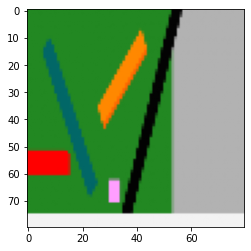

In [409]:
fep.dt = 0.01
fep.sigma = 1 * 1e3

start_int = random.randint(0, pose.shape[0])
goal_int = random.randint(0, pose.shape[0])

start_pose = pose[start_int]
start_img = img[start_int]

goal_pose = pose[goal_int]
goal_img = img[goal_int]

iterations = 50

# print(start_pose)
# plt.imshow(start_img.transpose(1,2,0))
# plt.show()
print(goal_pose)
plt.imshow(goal_img.transpose(1,2,0))
plt.show()

In [412]:
start_pose = [0.5, 0.5]

dists = np.zeros((10,10))

for i in range(10):
    for j in range(10):
        res = fep.run(start_pose, goal_img, iterations)
        path = np.array([x[0] for x in res])
        result_dif = (path[-1, 0], path[-1, 1]) - goal_pose
        result_dist = np.sqrt((result_dif[0]*16)**2 + (result_dif[1]*16)**2)



        dists[i, j] = result_dist


# imgs = np.array([x[1].detach().numpy().squeeze().transpose(1,2,0) for x in res])


print(result_dist)

TypeError: 'float' object cannot be interpreted as an integer